# Pyam Integration

*Note: This notebook will eventually show how OpenSCM integrates with Pyam. For now it's just a very basic sketch of how the integration will work.

*Note:* These notebooks will be re-written as part of our [first milestone](https://github.com/openclimatedata/openscm/milestone/1)

Here we make use of the ``scenarios`` module of OpenSCM. However, keep in mind the [direct connection to the IIASA database made available in Pyam](https://pyam-iamc.readthedocs.io/en/latest/tutorials/iiasa_dbs.html) for more in-depth analysis with up-to-date scenarios.

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt

import numpy as np
import pyam
import seaborn as sns
from pyam import IamDataFrame

from openscm.adapters import load_adapter
from openscm.core import ParameterSet, Core
from openscm.scmdataframe import ScmDataFrame, convert_core_to_scmdataframe, df_append
from openscm.scenarios import rcps
from openscm.timeseries_converter import ParameterType
from openscm.units import _unit_registry
from openscm.utils import convert_datetime_to_openscm_time, convert_openscm_time_to_datetime

<IPython.core.display.Javascript object>

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm-znfork/venv/lib/python3.7/site-packages/sphinxcontrib: missing __init__
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm-znfork/venv/lib/python3.7/site-packages/mpl_toolkits: missing __init__


In [2]:
sns.set(style="darkgrid")

Here we use the RCPs. Just for illustration, we firstly convert them back to `pyam.IamDataFrame`, then show how OpenSCM works with IamDataFrames from this point onwards.

*Note:* we have to filter the data first as IamDataFrames do not work with data outside of Panda's datetime bounds (see [here](https://stackoverflow.com/a/37226672)). 

In [3]:
df = IamDataFrame(rcps.filter(year=range(1, 2201)).timeseries())
type(df)

pyam.core.IamDataFrame

In [4]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CCl4', 'Emissions|CF4', 'Emissions|CFC11',
       'Emissions|CFC113', 'Emissions|CFC114', 'Emissions|CFC115',
       'Emissions|CFC12', 'Emissions|CH3Br', 'Emissions|CH3CCl3',
       'Emissions|CH3Cl', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HCFC141b',
       'Emissions|HCFC142b', 'Emissions|HCFC22', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310', 'Emissions|Halon1202', 'Emissions|Halon1211',
       'Emissions|Halon1301', 'Emissions|Halon2402', 'Emissions|N2O',
       'Emissions|NH3', 'Emissions|NMVOC', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|SF6', 'Emissions|SOx'], dtype=object)

In [5]:
df["region"].unique()

array(['World'], dtype=object)

In [6]:
df["scenario"].unique()

array(['RCP60', 'RCP26', 'RCP85', 'RCP45'], dtype=object)

*Note:* For an explanation of the `parameter_type` column, see the 'timeseries-conversion' notebook.

In [7]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

1765-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010763   

                                                                    1766-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010752   

                                                                    1767-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010748   

                                                                    1768-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010744   

                                                                    1769-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010740   

                                                                    1770-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.213024   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010736   

                                                                    1771-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.239742   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010731   

                                           

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

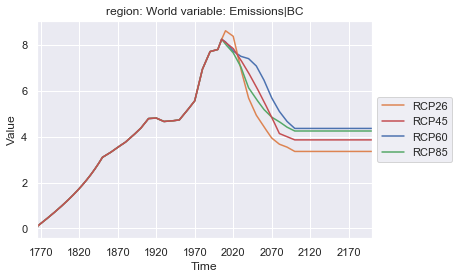

In [8]:
df.filter(variable='Emissions|BC').line_plot(
    x="time",
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial.

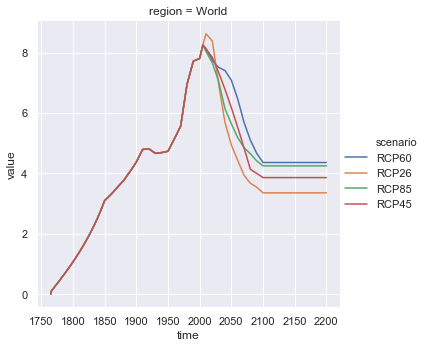

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);

TODO's whilst writing:

- expose `unit_registry` publicly, seems easiest way to do things?
- fix warning when doing `to_core` calls with `climate_model` column set
- work out usefulness/otherwise of region in scalar views
- convenience method for setting start/stop time sensibly
- fix conversion of core to scmdataframe and back (remove hard-coding of parameter type)
- add method to get point timeseries from average and vice versa
- add get unit for variable method
- decide if time points can be non-int

In [10]:
scenarios = rcps
start_time = convert_datetime_to_openscm_time(dt.datetime(1950, 1, 1))
stop_time = convert_datetime_to_openscm_time(dt.datetime(2050, 1, 1))
climate_model_configs = {
    "PH99": [
        {
            ("ecs",): 3.0 * _unit_registry("delta_degC"),
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
        }, 
        {
            ("ecs",): 2.5 * _unit_registry("delta_degC"), 
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
            ("PH99", "sigma"): 4 * _unit_registry("1/yr"),
        }, 
        {
            ("ecs",): 2.0 * _unit_registry("delta_degC"), 
            ("start_time",): start_time * _unit_registry("s"),  # could take this from scenario information if not set?
            ("stop_time",): stop_time * _unit_registry("s"),
            ("PH99", "sigma"): 3.5 * _unit_registry("1/yr"),
        }
    ]
}

results = []
for cm, cfgs in climate_model_configs.items():
    input_paraset = ParameterSet()
    output_paraset = ParameterSet()
    adapter = load_adapter(cm)(input_paraset, output_paraset)
    
    for (model, scenario), df in scenarios._meta.groupby(["model", "scenario"]):
        print(model)
        print(scenario)
        mod_scen_scmdf = scenarios.filter(model=model, scenario=scenario)
        mod_scen_scmdf.set_meta(cm, name="climate_model")
        
        # nasty hack, we really need a `overwrite_values(other_parameter_set)` method
        # on `ParameterSet` if we want to be able to have the parameters persist
        for v in [("Emissions", "CO2", "MAGICC AFOLU"), ("Emissions", "CO2", "MAGICC Fossil and Industrial")]:
            region="World"
            fdf = mod_scen_scmdf.filter(
                variable=mod_scen_scmdf.data_hierarchy_separator.join(v), 
                region=region
            )
            units = fdf["unit"].unique()
            assert len(units) == 1
            units = units[0]
            time_bounds = fdf.time_points
            time_bounds = np.concatenate([
                time_bounds,
                [2*time_bounds[-1] - time_bounds[-2]]
            ])

            input_paraset.get_writable_timeseries_view(
                v,
                (region,),
                units,
                time_bounds,
                ParameterType.AVERAGE_TIMESERIES
            ).set(fdf.values.squeeze())
            
        adapter.initialize_model_input()
        
        for cfg in cfgs:
            for name, value in cfg.items():
                adapter._parameters.get_writable_scalar_view(
                    name,
                    ("World",),  # hard-coded!!
                    str(value.units)
                ).set(value.magnitude)
            
            adapter.initialize_run_parameters()
            adapter.reset()  # right order?
            adapter.run()
            
            # hack around broken functions
            out_times = [
                convert_datetime_to_openscm_time(dt.datetime(y, 1, 1)) for y in range(1950, 2050)
            ]
            temperature_units = "delta_degC"
            temperature_values = output_paraset.get_timeseries_view(
                ("Surface Temperature",),
                ("World",),
                temperature_units,
                out_times,
                ParameterType.POINT_TIMESERIES,
            ).get()
            
            conc_units = "ppm"
            conc_values = output_paraset.get_timeseries_view(
                ("Atmospheric Concentrations", "CO2"),
                ("World",),
                conc_units,
                out_times,
                ParameterType.POINT_TIMESERIES,
            ).get()
            
            res_here = ScmDataFrame(
                data=np.vstack([temperature_values, conc_values]).T,
                index=[convert_openscm_time_to_datetime(t) for t in out_times],
                columns={
                    "climate_model": cm,
                    "model": model,
                    "scenario": scenario,
                    "unit": [temperature_units, conc_units],
                    "variable": ["Surface Temperature", "Atmospheric Concentrations|CO2"],
                    "region": "World",
                }
            )
            for name, value in cfg.items():
                label = "{} ({})".format(
                    "|".join(name), 
                    value.units
                )
                res_here.set_meta(value.magnitude, label)
            
            results.append(res_here)
            
                
results = df_append(results)

AIM
RCP60


Not using stop_time
Updating ecs also updates alpha
Converting input World from string to tuple


IMAGE
RCP26
MESSAGE
RCP85
MiniCAM
RCP45


In [11]:
results.head()

time                                                                                                                                                      1950-01-01  \
model scenario region variable                       unit       PH99|sigma (1 / a) climate_model ecs (delta_degC) start_time (second) stop_time (second)               
AIM   RCP60    World  Atmospheric Concentrations|CO2 ppm        NaN                PH99          3.0              -631152000          2524608000               290.0   
                      Surface Temperature            delta_degC NaN                PH99          3.0              -631152000          2524608000                 0.0   
                      Atmospheric Concentrations|CO2 ppm        3.5                PH99          2.0              -631152000          2524608000               290.0   
                      Surface Temperature            delta_degC 3.5                PH99          2.0              -631152000          2524608000                 0.0   
                      Atmospheric Concentrations|CO2 ppm        4.0                PH99          2.5              -631152000          2524608000               290.0   

time                                                                                                                                                      1951-01-01  \
model scenario region variable                       unit       PH99|sigma (1 / a) climate_model ecs (delta_degC) start_time (second) stop_time (second)               
AIM   RCP60    World  Atmospheric Concentrations|CO2 ppm        NaN                PH99          3.0              -631152000          2524608000          291.184763   
                      Surface Temperature            delta_degC NaN                PH99          3.0              -631152000          2524608000            0.000000   
                      Atmospheric Concentrations|CO2 ppm        3.5                PH99          2.0              -631152000          2524608000          291.184763   
                      Surface Temperature            delta_degC 3.5                PH99          2.0              -631152000          2524608000            0.000000   
                      Atmospheric Concentrations|CO2 ppm        4.0                PH99          2.5              -631152000          2524608000          291.184763   

time                                                                                                                                                      1952-01-01  \
model scenario region variable                       unit       PH99|sigma (1 / a) climate_model ecs (delta_degC) start_time (second) stop_time (second)               
AIM   RCP60    World  Atmospheric Concentrations|CO2 ppm        NaN                PH99          3.0              -631152000          2524608000          292.504749   
                      Surface Temperature            delta_degC NaN                PH99          3.0              -631152000          2524608000            0.000354   
                      Atmospheric Concentrations|CO2 ppm        3.5                PH99          2.0              -631152000          2524608000          292.504749   
                      Surface Temperature            delta_degC 3.5                PH99          2.0              -631152000          2524608000            0.000354   
                      Atmospheric Concentrations|CO2 ppm        4.0                PH99          2.5              -631152000          2524608000          292.504749   

time                                                                                                                                                      1953-01-01  \
model scenario region variable                       unit       PH99|sigma (1 / a) climate_model ecs (delta_degC) start_time (second) stop_time (second)               
AIM   RCP60    World  Atmospheric Concentrations|CO2 ppm        NaN                PH99          3.0              -631152000         

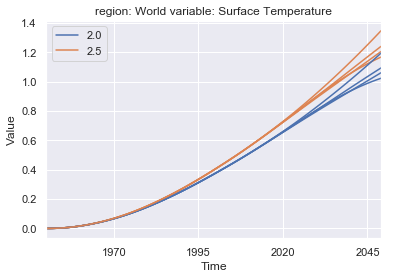

In [12]:
# IamDataFrame doesn't work with nan in metadata so ECS=3K runs are dropped...
results.filter(variable="Surface Temperature").line_plot(color="ecs (delta_degC)");

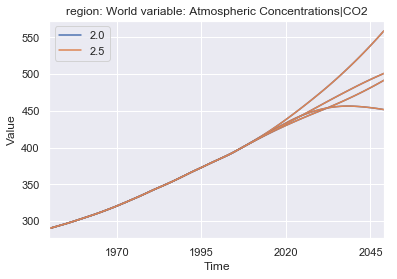

In [13]:
# IamDataFrame doesn't work with nan in metadata so ECS=3K runs are dropped...
results.filter(variable="*Conc*").line_plot(color="ecs (delta_degC)");